In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
subject001_experiment2_1 = pd.read_csv("arduino_person_001_exp_2_trial_1.csv", encoding="latin", header=None, names=["position", "force"])
subject001_experiment2_2 = pd.read_csv("arduino_person_001_exp_2_trial_2.csv", encoding="latin", header=None, names=["position", "force"])

subject002_experiment2_1 = pd.read_csv("arduino_person_002_exp_2_trial_1.csv", encoding="latin", header=None, names=["position", "force"])
subject002_experiment2_2 = pd.read_csv("arduino_person_002_exp_2_trial_2.csv", encoding="latin", header=None, names=["position", "force"])

subject003_experiment2_1 = pd.read_csv("arduino_person_003_exp_2_trial_1.csv", encoding="latin", header=None, names=["position", "force"])
subject003_experiment2_2 = pd.read_csv("arduino_person_003_exp_2_trial_2.csv", encoding="latin", header=None, names=["position", "force"])

subject004_experiment2_1 = pd.read_csv("arduino_person_004_exp_2_trial_1.csv", encoding="latin", header=None, names=["position", "force"])
subject004_experiment2_2 = pd.read_csv("arduino_person_004_exp_2_trial_2.csv", encoding="latin", header=None, names=["position", "force"])

subject005_experiment2_1 = pd.read_csv("arduino_person_005_exp_2_trial_1.csv", encoding="latin", header=None, names=["trigger", "position", "force"])
subject005_experiment2_2 = pd.read_csv("arduino_person_005_exp_2_trial_2.csv", encoding="latin", header=None, names=["trigger", "position", "force"])

subject006_experiment2_1 = pd.read_csv("arduino_person_006_exp_2_trial_2.csv", encoding="latin", header=None, names=["trigger", "position", "force"])
subject006_experiment2_2 = pd.read_csv("arduino_person_006_exp_2_trial_1.csv", encoding="latin", header=None, names=["trigger", "position", "force"])

subject007_experiment2_1 = pd.read_csv("arduino_person_007_exp_2_trial_2.csv", encoding="latin", header=None, names=["trigger", "position", "force"])
subject007_experiment2_2 = pd.read_csv("arduino_person_007_exp_2_trial_1.csv", encoding="latin", header=None, names=["trigger", "position", "force"])

subject008_experiment2_1 = pd.read_csv("arduino_person_008_exp_2_trial_2.csv", encoding="latin", header=None, names=["trigger", "position", "force"])
subject008_experiment2_2 = pd.read_csv("arduino_person_008_exp_2_trial_1.csv", encoding="latin", header=None, names=["trigger", "position", "force"])

subject009_experiment2_1 = pd.read_csv("arduino_person_009_exp_2_trial_2.csv", encoding="latin", header=None, names=["trigger", "position", "force"])
subject009_experiment2_2 = pd.read_csv("arduino_person_009_exp_2_trial_1.csv", encoding="latin", header=None, names=["trigger", "position", "force"])

subject010_experiment2_1 = pd.read_csv("arduino_person_010_exp_2_trial_2.csv", encoding="latin", header=None, names=["trigger", "position", "force"])
subject010_experiment2_2 = pd.read_csv("arduino_person_010_exp_2_trial_1.csv", encoding="latin", header=None, names=["trigger", "position", "force"])

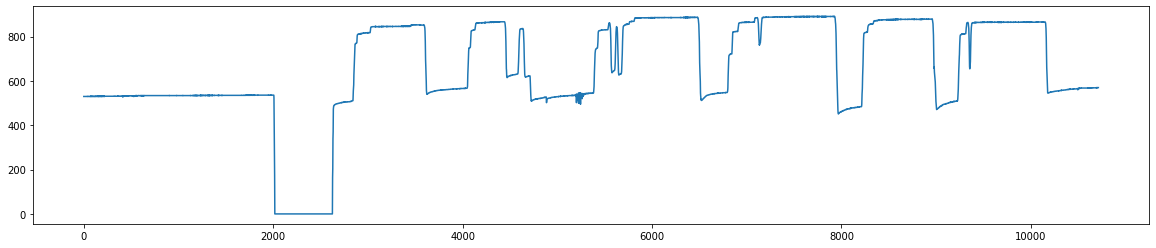

In [30]:
plt.figure(figsize=(20,4))
plt.plot(subject008_experiment2_2.loc[:, "force"])
plt.show()

In [35]:
by_change = subject008_experiment2_2.groupby("trigger")
print(subject008_experiment2_2["trigger"])

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
10709    10.0
10710    10.0
10711    10.0
10712    10.0
10713    10.0
Name: trigger, Length: 10714, dtype: float64


In [4]:
subject001_experiment2_1[1768:1790]

,position,force
1768,407,722.0
1769,406,739.0
1770,403,757.0
1771,402,766.0
1772,401,776.0
1773,400,781.0
1774,400,784.0
1775,400,787.0
1776,400,789.0
1777,400,789.0


In [5]:
subject001_experiment2_1["diff_lag15"] = subject001_experiment2_1["force"] - subject001_experiment2_1["force"].shift(15)
subject001_experiment2_1["is_changing"] = (subject001_experiment2_1["diff_lag15"] > 50) | (subject001_experiment2_1["diff_lag15"] < - 50)
subject001_experiment2_1["climbing_group"] = subject001_experiment2_1["is_changing"].cumsum()

by_climbing_group = subject001_experiment2_1.reset_index().groupby("climbing_group")["index"].agg(["min", "max", "count"])
by_climbing_group = by_climbing_group[(by_climbing_group["count"] > 400) & (by_climbing_group.index > 0) & (by_climbing_group.index < by_climbing_group.index.max())]

print(subject001_experiment2_1)

      position  force  diff_lag15  is_changing  climbing_group
0          420  628.0         NaN        False               0
1          420  628.0         NaN        False               0
2          420  628.0         NaN        False               0
3          420  628.0         NaN        False               0
4          420  628.0         NaN        False               0
...        ...    ...         ...          ...             ...
8689       426  548.0         1.0        False             343
8690       426  548.0         1.0        False             343
8691       426  548.0         1.0        False             343
8692       426  548.0         1.0        False             343
8693       426  548.0         0.0        False             343

[8694 rows x 5 columns]


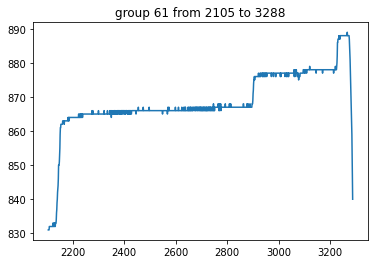

Segment average: 868.71. Std: 9.26


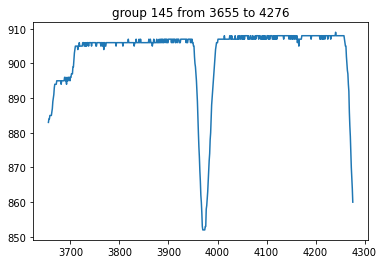

Segment average: 902.98. Std: 10.43


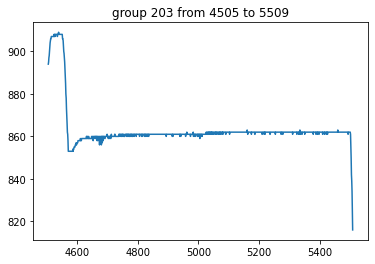

Segment average: 863.36. Std: 10.71


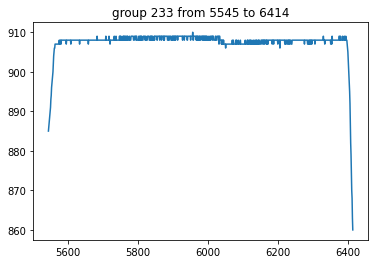

Segment average: 907.38. Std: 4.16


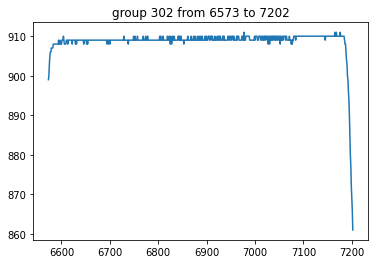

Segment average: 908.68. Std: 4.19


In [6]:
for group, row in by_climbing_group.iterrows():
    subset = subject001_experiment2_1.loc[row["min"]:row["max"]]
    plt.plot(subset["force"])
    plt.title(f"group {group} from {row['min']} to {row['max']}")
    plt.show()

    print(f"Segment average: {subset['force'].mean():.2f}. Std: {subset['force'].std():.2f}")

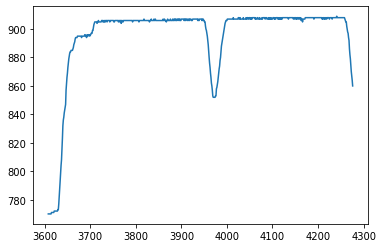

In [89]:
subset = subject001_experiment2_1.loc[3608:4276]
plt.plot(subset["force"])
plt.show()

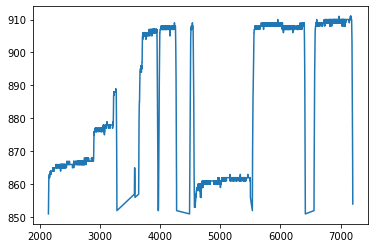

In [47]:
# data = []  # Create an empty list to store the filtered data

# for i in range(len(subject001_experiment2_1.index)):
#     if subject001_experiment2_1["force"][i] > 850:
#         data.append(subject001_experiment2_1["force"][i])  # Append the value to the list

plt.plot(subject001_experiment2_1.loc[subject001_experiment2_1["force"] > 850, "force"])
plt.show()

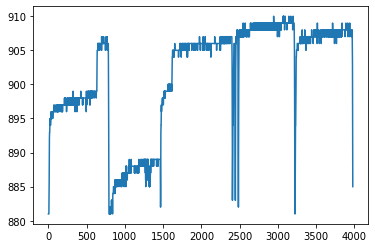

In [38]:
data = []  # Create an empty list to store the filtered data

for i in range(len(subject002_experiment2_1.index)):
    if subject002_experiment2_1["force"][i] > 880:
        data.append(subject002_experiment2_1["force"][i])  # Append the value to the list

plt.plot(data)
plt.show()

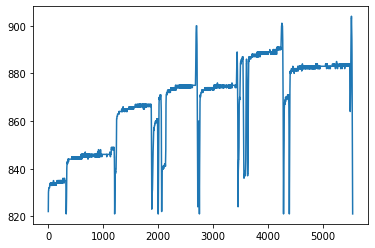

In [39]:
data = []  # Create an empty list to store the filtered data

for i in range(len(subject001_experiment2_2.index)):
    if subject001_experiment2_2["force"][i] > 820:
        data.append(subject001_experiment2_2["force"][i])  # Append the value to the list

plt.plot(data)
plt.show()

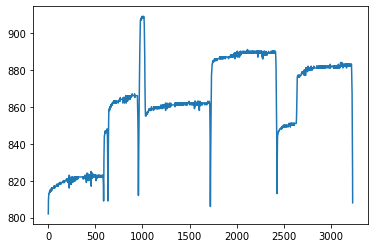

In [36]:
data = []  # Create an empty list to store the filtered data

for i in range(len(subject002_experiment2_2.index)):
    if subject002_experiment2_2["force"][i] > 800:
        data.append(subject002_experiment2_2["force"][i])  # Append the value to the list

plt.plot(data)
plt.show()